<a href="https://colab.research.google.com/github/neelima-singh07/Machine-Learning-/blob/main/K_means_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#needs Revision , it is bit confusing

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Import Dataset

In [3]:
data=pd.read_excel('/content/amazon-dataset.xlsx')
data

,Cus_ID,Sex,Age,Income,Rating
0,301219,M,23,306555,44
1,301220,F,26,306555,91
2,301221,F,24,326992,7
3,301222,M,28,326992,87
4,301223,F,38,347429,45
...,...,...,...,...,...
195,301414,F,42,2452440,89
196,301415,F,54,2575062,32
197,301416,M,39,2575062,83
198,301417,M,39,2799869,21


# Drop unnecessary cols and take the salary and rating cols

In [5]:
data = data.drop(columns=['Cus_ID'])

In [19]:
x=data.iloc[:,[1,3]].values
print(x)

[[ 23  44]
 [ 26  91]
 [ 24   7]
 [ 28  87]
 [ 38  45]
 [ 27  86]
 [ 42   7]
 [ 28 106]
 [ 77   4]
 [ 36  81]
 [ 81  16]
 [ 42 111]
 [ 70  17]
 [ 29  87]
 [ 45  15]
 [ 27  89]
 [ 42  40]
 [ 24  74]
 [ 63  33]
 [ 42 110]
 [ 42  40]
 [ 30  82]
 [ 56   6]
 [ 38  82]
 [ 65  16]
 [ 35  92]
 [ 54  36]
 [ 42  69]
 [ 48  35]
 [ 28  98]
 [ 72   5]
 [ 26  82]
 [ 64   5]
 [ 22 104]
 [ 59  16]
 [ 26  91]
 [ 51  20]
 [ 36  82]
 [ 44  30]
 [ 24  84]
 [ 78  40]
 [ 29 104]
 [ 58  41]
 [ 38  69]
 [ 59  32]
 [ 29  73]
 [ 60  62]
 [ 33  53]
 [ 35  48]
 [ 38  48]
 [ 59  59]
 [ 40  68]
 [ 38  61]
 [ 71  68]
 [ 60  51]
 [ 57  46]
 [ 62  56]
 [ 83  52]
 [ 33  58]
 [ 64  52]
 [ 84  63]
 [ 23  62]
 [ 81  59]
 [ 65  67]
 [ 76  58]
 [ 22  67]
 [ 52  56]
 [ 82  54]
 [ 23  67]
 [ 39  53]
 [ 84  62]
 [ 57  48]
 [ 72  55]
 [ 72  63]
 [ 71  53]
 [ 32  61]
 [ 54  60]
 [ 48  54]
 [ 28  59]
 [ 59  48]
 [ 69  58]
 [ 46  62]
 [ 81  46]
 [ 56  50]
 [ 26  64]
 [ 58  52]
 [ 66  65]
 [ 27  62]
 [ 41  68]
 [ 60  52]
 [ 82  62]

# Optimal Clusters via Elbow method

Text(0, 0.5, 'WCSS')

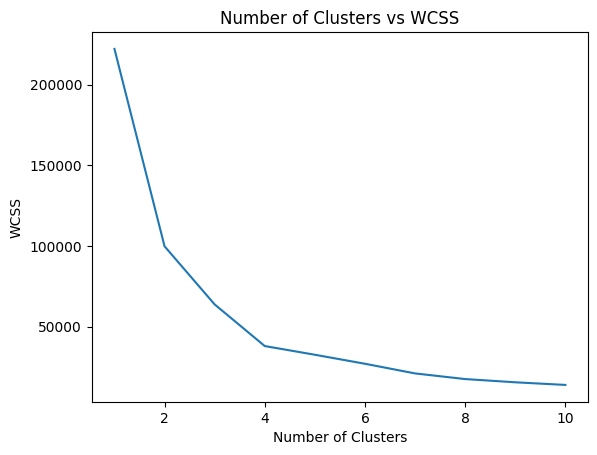

In [20]:
from sklearn.cluster import KMeans
wcss=[]
for i in range(1,11):
  kmeans=KMeans(n_clusters=i,init='k-means++',random_state=21)
  kmeans.fit(x)
  wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.title('Number of Clusters vs WCSS')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')

# K Means Model Training

In [21]:
kmeans=KMeans(n_clusters=4,init='k-means++',random_state=21)
y_kmeans=kmeans.fit_predict(x)

In [22]:
print(y_kmeans) #clusters

[2 0 1 0 2 0 1 0 1 0 1 0 1 0 1 0 2 2 1 0 2 0 1 0 1 0 1 2 1 0 1 0 1 0 1 0 1
 0 1 0 3 0 3 2 1 2 3 2 2 2 3 2 2 3 3 3 3 3 2 3 3 2 3 3 3 2 3 3 2 2 3 3 3 3
 3 2 3 2 2 3 3 2 3 3 2 3 3 2 2 3 3 2 3 2 2 2 3 2 3 2 2 3 3 2 3 2 3 3 3 3 3
 2 2 2 2 2 3 3 3 3 2 2 2 0 2 0 3 0 1 0 1 0 2 0 1 0 1 0 1 0 1 0 2 0 1 0 3 0
 1 0 1 0 1 0 1 0 1 0 1 0 3 0 1 0 1 0 1 0 1 2 1 0 1 0 1 0 1 0 1 0 1 0 1 0 2
 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0]


# Visualising clusters

Text(0, 0.5, 'Rating')

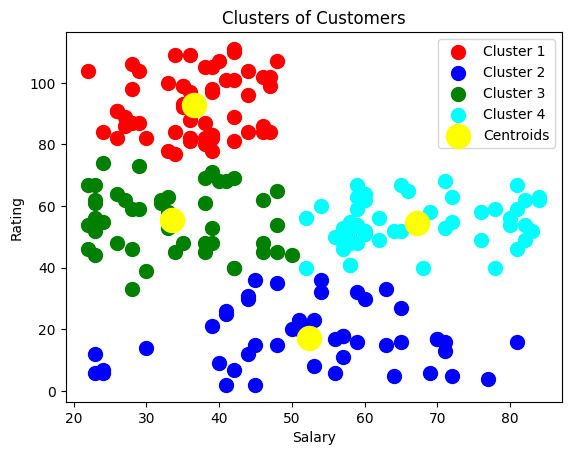

In [24]:
plt.scatter(x[y_kmeans==0,0],x[y_kmeans==0,1],s=100,c='red',label='Cluster 1')
plt.scatter(x[y_kmeans==1,0],x[y_kmeans==1,1],s=100,c='blue',label='Cluster 2')
plt.scatter(x[y_kmeans==2,0],x[y_kmeans==2,1],s=100,c='green',label='Cluster 3')
plt.scatter(x[y_kmeans==3,0],x[y_kmeans==3,1],s=100,c='cyan',label='Cluster 4')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=300,c='yellow',label='Centroids')
plt.legend( )



plt.title('Clusters of Customers')
plt.xlabel('Salary')
plt.ylabel('Rating')


In [ ]:
#we can do the same for age and rating which makes more sense
#or other 2 cols